In [16]:
from bs4 import BeautifulSoup as bs
import requests
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [17]:
df = pd.read_csv("Final Dataset.csv") 

In [18]:
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
7084,NIMIQ 1,Geostationary,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
7085,MSAT M1,Geostationary,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
7086,ANIK E1,Geostationary,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
7087,ANIK E2,Geostationary,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7089 non-null   object 
 1   Type         7089 non-null   object 
 2   Norad ID     7089 non-null   int64  
 3   Int'l Code   7089 non-null   object 
 4   Perigee      7089 non-null   float64
 5   Apogee       7089 non-null   float64
 6   Period       7089 non-null   float64
 7   Launch Date  7089 non-null   object 
 8   Source       7089 non-null   object 
 9   Month        7089 non-null   int64  
 10  Orbit        7089 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 609.3+ KB


In [20]:
df.describe()

,Norad ID,Perigee,Apogee,Period,Month,Orbit
count,7089.000000,7089.000000,7089.000000,7089.000000,7089.000000,7089.000000
mean,34505.509804,6917.974016,8289.001918,360.014135,6.494428,1.272253
std,14932.869109,12946.229152,16648.322907,607.913053,3.608642,0.534180
min,5.000000,145.200000,161.300000,87.400000,1.000000,1.000000
25%,22238.000000,552.800000,555.400000,95.600000,3.000000,1.000000
50%,41998.000000,644.000000,773.200000,99.300000,6.000000,1.000000
75%,46931.000000,1467.400000,1552.100000,115.900000,10.000000,1.000000
max,50851.000000,117133.000000,339419.700000,13976.800000,12.000000,3.000000


In [21]:
# Delete all the rows with Type = XXX (means NULL)

df.drop(df.index[df['Type'] == 'XXX'], inplace = True)
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,Starlink,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,Starlink,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,Starlink,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,Starlink,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,Starlink,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
7084,NIMIQ 1,Geostationary,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
7085,MSAT M1,Geostationary,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
7086,ANIK E1,Geostationary,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
7087,ANIK E2,Geostationary,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


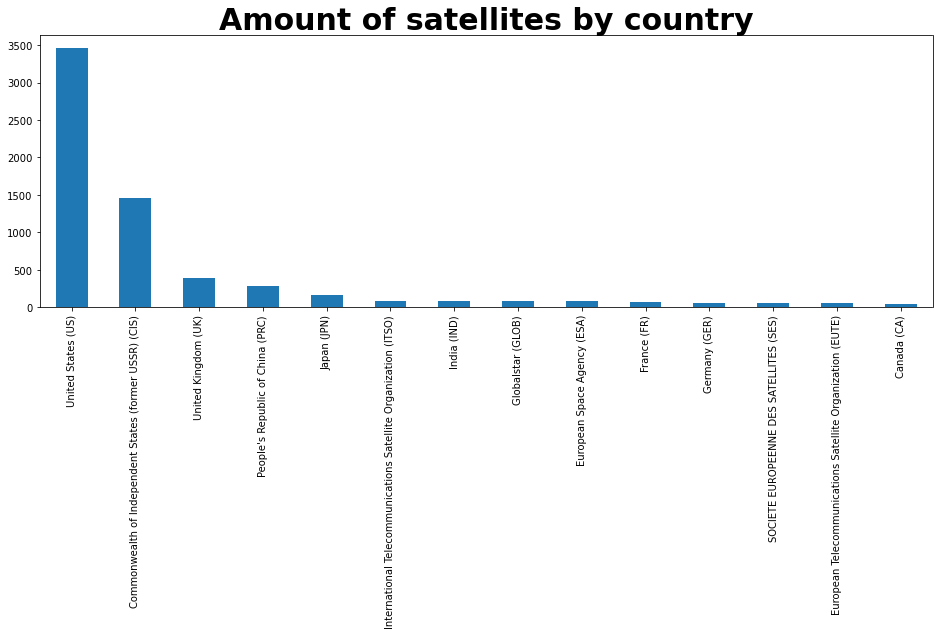

In [22]:
df['Source'].value_counts().plot(kind='bar', figsize=[16,5])
plt.title('Amount of satellites by country', fontdict={'fontsize':30,'fontweight':'bold'})
plt.xlabel('',fontdict= {'fontsize':10})
plt.ylabel('',fontdict= {'fontsize':10})
plt.show()

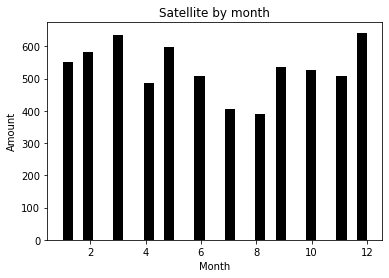

In [23]:
df.Month.hist(bins=30, grid = False, rwidth=1, color ='black')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Satellite by month')
plt.savefig('hist_chart_month.png', transparent = True)
plt.show()

## Orbit: under 130 = 1, between 130 to 1450 = 2, over 1450 = 3

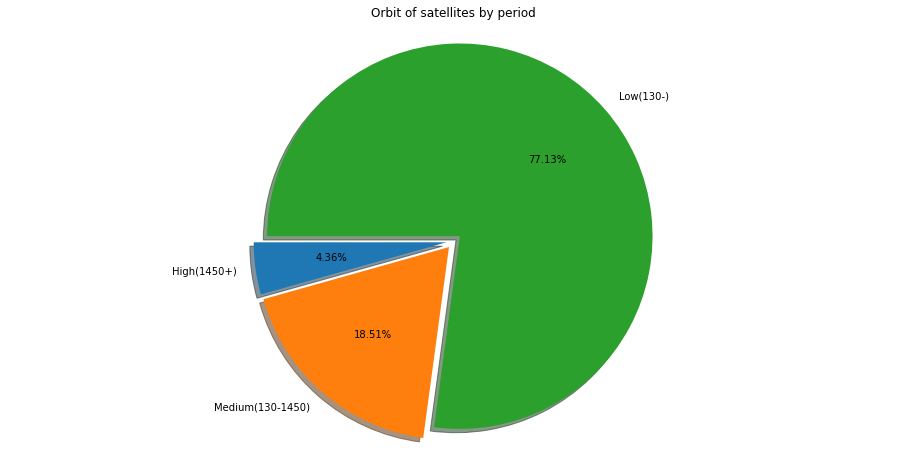

In [10]:
df_under_130 = df[df['Period']<130].reset_index(drop=True)
df_130_to_1450 = df[(df['Period']>=130) & (df['Period']<=1450)].reset_index(drop=True)
df_over_1450 = df[df['Period']>1450].reset_index(drop=True)

df_under_130['Orbit'] = 1
df_130_to_1450['Orbit'] = 2
df_over_1450['Orbit'] = 3

sizes = [len(df_over_1450)/len(df)*100,len(df_130_to_1450)/len(df)*100,len(df_under_130)/len(df)*100]
labels = [ 'High(1450+)', 'Medium(130-1450)', 'Low(130-)']
explode = (0.04, 0.04, 0.04)
fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Orbit of satellites by period')
plt.savefig('pie_chart_period.png', transparent = True)
plt.show()

## Satellites type's:

In [24]:
df['Type'].value_counts()

Starlink                                         1820
Geostationary                                     682
Strela                                            557
Military                                          446
OneWeb                                            388
Space & Earth Science                             318
Flock                                             297
Amateur radio                                     178
Glonass Constellation                             134
Experimental                                      121
Lemur                                             108
Iridium                                           106
Earth resources                                   102
Parus                                              86
Globalstar                                         84
Weather                                            76
Intelsat                                           71
CubeSats                                           57
Global Positioning System (G

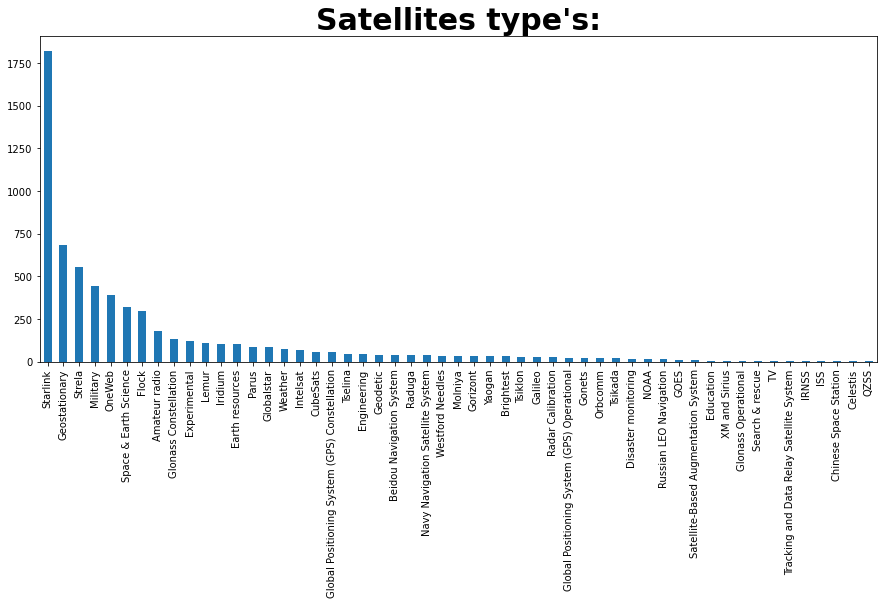

In [25]:
plt.figure(figsize=[15,6])
df['Type'].value_counts().plot(kind='bar')
plt.title("Satellites type's:", fontdict={'fontsize':30,'fontweight':'bold', 'color':'black'})
plt.xlabel('',fontdict= {'fontsize':16})
plt.ylabel('',fontdict= {'fontsize':10})
plt.show()

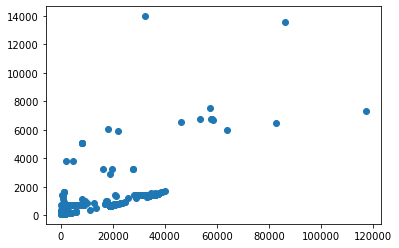

In [26]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df.Perigee , df.Period)
plt.show()

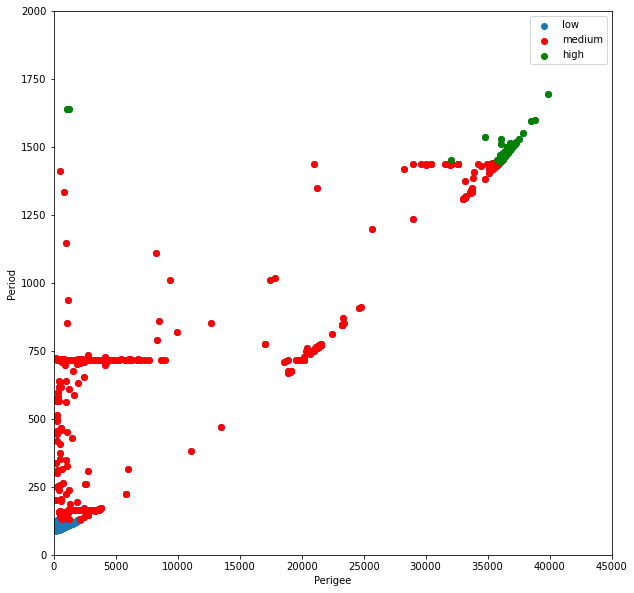

In [27]:
colormap = np.array(['b', 'r', 'g'])
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_ylim(0,2000)
ax.set_xlim(0,45000)

ax.scatter(df.Perigee, df.Period)
ax.scatter(df.Perigee[df.Orbit==2], df.Period[df.Orbit==2], c='red')
ax.scatter(df.Perigee[df.Orbit==3], df.Period[df.Orbit==3], c='green')
ax.legend(labels=['low','medium', 'high'])
plt.xlabel('Perigee')
plt.ylabel('Period')
plt.savefig('colormap_Perigee&Period.png', transparent = True)
plt.show()

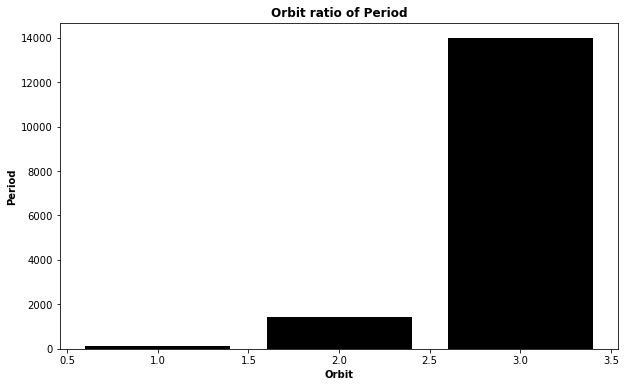

In [28]:
plt.figure(figsize=[10,6])
plt.bar(df['Orbit'], df['Period'],color=['black']) 
plt.title('Orbit ratio of Period', fontdict={'fontweight':'bold'})
plt.xlabel('Orbit', fontdict={'fontweight':'bold'})
plt.ylabel('Period', fontdict={'fontweight':'bold'})
plt.show()

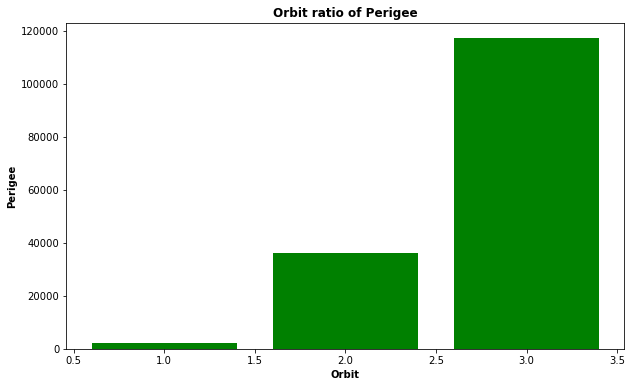

In [30]:
plt.figure(figsize=[10,6])
plt.bar(df['Orbit'], df['Perigee'],color=['green'])
plt.title('Orbit ratio of Perigee', fontdict={'fontweight':'bold'})
plt.xlabel('Orbit', fontdict={'fontweight':'bold'})
plt.ylabel('Perigee', fontdict={'fontweight':'bold'})
plt.show()

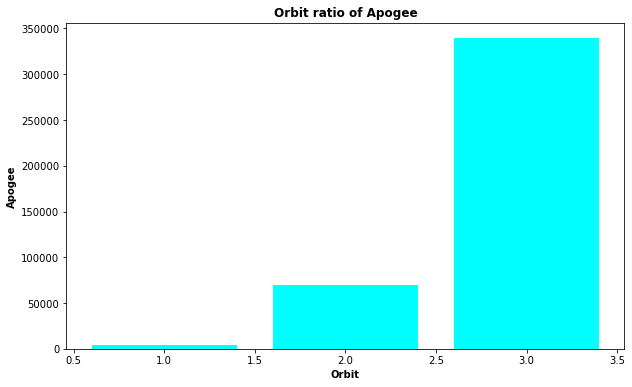

In [29]:
plt.figure(figsize=[10,6])
plt.bar(df['Orbit'], df['Apogee'],color = ['cyan']) 
plt.title('Orbit ratio of Apogee', fontdict={'fontweight':'bold'})
plt.xlabel('Orbit', fontdict={'fontweight':'bold'})
plt.ylabel('Apogee', fontdict={'fontweight':'bold'})
plt.show()